# Movie Genre Guesser

## Setup

### Imports and Read in Data

In [1]:
import pandas as pd

df_ratings = pd.read_csv('data/IMDb ratings.csv', low_memory=False)
df_movies = pd.read_csv('data/IMDb movies.csv', low_memory=False)

In [2]:
df_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [3]:
df_ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


### Removes Unnecessary Columns

In [4]:
df_ratings.drop(df_ratings.columns[5:], axis='columns', inplace=True)
df_ratings.drop(labels= ['weighted_average_vote', 'total_votes'],axis='columns', inplace=True)

In [5]:
df_ratings.head()

,imdb_title_id,mean_vote,median_vote
0,tt0000009,5.9,6.0
1,tt0000574,6.3,6.0
2,tt0001892,6.0,6.0
3,tt0002101,5.3,5.0
4,tt0002130,6.9,7.0


In [6]:
df_movies.drop(df_movies.columns[16:], axis='columns', inplace=True)
df_movies.drop(['original_title'], axis='columns', inplace=True)

In [7]:
df_movies.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237


### Combines DataFrames

In [8]:
df_combined = pd.merge(df_movies, df_ratings, on="imdb_title_id").dropna()

## Exploratory Data Analysis (EDA)

In [9]:
import seaborn as sea

In [10]:
df_combined['genre'] = df_combined['genre'].apply(lambda x : x.split(',')[0])

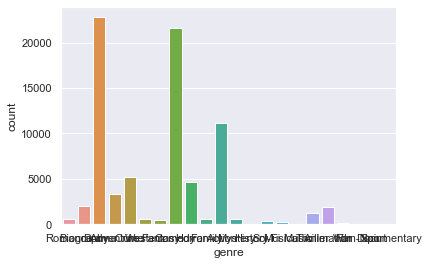

In [11]:
sea.set_theme()
genre_count_plot = sea.countplot(x='genre', data=df_combined)

<AxesSubplot:xlabel='duration', ylabel='Count'>

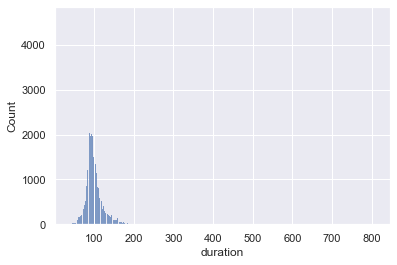

In [12]:
sea.histplot(x='duration', data=df_combined, stat='count')

In the above chart you can notice that most movies have a duration of under 250. To clean up and normalize
the data I have decided to drop all the rows were the duration is created than 250.

In [13]:
to_drop = df_combined[~(df_combined['duration'] < 250)].index
df_combined.drop(to_drop, inplace=True)

### Charts of Data Analysis

<AxesSubplot:xlabel='duration', ylabel='Count'>

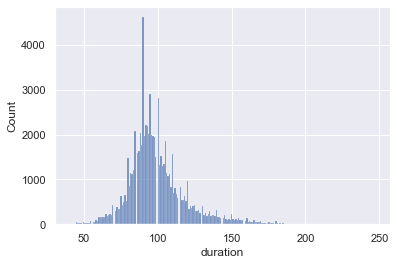

In [14]:
sea.histplot(x='duration', data=df_combined, stat='count')

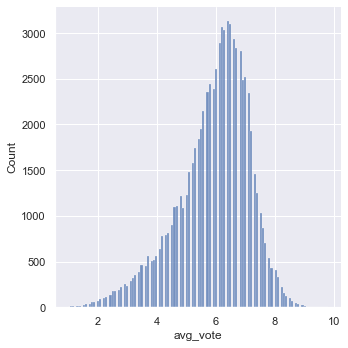

In [15]:
sea.displot(x='avg_vote', data=df_combined)

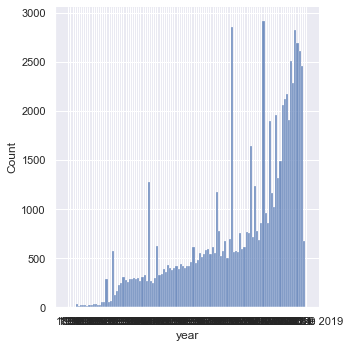

In [16]:
sea.displot(x='year', data=df_combined)


## The Fun Part

In [17]:
from sklearn.model_selection import train_test_split
genres = list(df_combined['genre'].unique())
print(genres)

['Romance', 'Biography', 'Drama', 'Adventure', 'Crime', 'Western', 'Fantasy', 'Comedy', 'Horror', 'Family', 'Action', 'Mystery', 'History', 'Sci-Fi', 'Musical', 'Music', 'Thriller', 'Animation', 'War', 'Film-Noir', 'Sport', 'Documentary']


In [18]:
genre_mapping = {}
for x in range(len(genres)):
    genre_mapping[genres[x]] = x

In [19]:
df_combined['genre'] = df_combined['genre'].map(genre_mapping)
df_combined.drop(columns=['imdb_title_id', 'date_published', 'title', 'country', 'language', 'director', 'writer', 'production_company', 'actors', 'description', 'year'], inplace=True)
x_train, x_test= train_test_split(df_combined)

In [20]:
test_genres = x_test['genre']
del x_test['genre']
x_test.head()

,duration,avg_vote,votes,mean_vote,median_vote
11262,87,5.5,750,5.6,6.0
19323,98,7.3,102977,7.5,8.0
82432,138,4.7,1174,4.9,5.0
59827,87,6.3,1031,6.5,7.0
66577,101,6.8,1418,7.3,7.0


In [21]:
train_genres = x_train['genre']
del x_train['genre']

### Categorical Naive Bayes

In [22]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(x_train, train_genres)

CategoricalNB()

In [23]:
prediction = clf.predict(x_test)

IndexError: index 2278845 is out of bounds for axis 1 with size 2241616

In [ ]:
print(prediction)
x_test['prediction'] = prediction

In [ ]:
clf.score(x_test, test_genres)

Using Categorical Naive Bayes was able to get 33.3% accuracy. Lets try some other algorithims to see if I can get better results.

### Linear Support Vector Classification

In [ ]:
# sklearn SVC imports
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


In [ ]:
genre_count = len(genre_mapping)
random_state = 0

X, y = make_classification(n_features=6, n_classes=genre_count, random_state=random_state)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
clf.fit(X, y)

In [ ]:
prediction = clf.predict(x_test)
print(prediction)

In [ ]:
x_test['prediction'] = prediction
score = clf.score(x_test, test_genres)